In [198]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [199]:
# few-shot -> 변동성 매우 큼 -> finetune에서도 best model을 선택할 수 있는 방법은?
# 매우 간단하게는 best valid 인데 few-shot인데 valid를 따로 빼기는 말이 안되는 상황

# 또는, epoch이 진행될수록 안정적으로 성능을 향상시키는 finetune 방법이 필요한 듯

# 이 문제를 해결하면 baseline body도 제안 가능. 물론 왜 이렇게 성능을 이기는 지 설명을 붙여야 하지만

In [200]:
def dropna(arr, *args, **kwarg):
    assert isinstance(arr, np.ndarray)
    dropped=pd.DataFrame(arr).dropna(*args, **kwarg).values
    if arr.ndim==1:
        dropped=dropped.flatten()
    return dropped

In [210]:
dataset = 'ISIC' # CropDisease, EuroSAT, ISIC, ChestX
n_way = 5
n_shot = 1
ft = 100 # 각 task 마다 최고의 finetune 횟수는 너무 다를 거 같은데..
bs = 4

# alg1_results = pd.read_csv('./logs/checkpoints/miniImageNet/ResNet10_baseline_aug/{}_{}way{}shot_ft{}_bs{}.csv'.format(dataset,
#                                                                                                                n_way,
#                                                                                                                n_shot,
#                                                                                                                ft,
#                                                                                                                bs), index_col=0)
# alg1_results = alg1_results.to_numpy()
# alg1_results = dropna(alg1_results)

# alg2_results = pd.read_csv('./logs/checkpoints/miniImageNet/ResNet10_baseline_aug/{}_{}way{}shot_ft{}_bs{}.csv'.format(dataset,
#                                                                                                                     n_way,
#                                                                                                                     n_shot,
#                                                                                                                     ft,
#                                                                                                                     bs), index_col=0)
# alg2_results = alg2_results.to_numpy()
# alg2_results = dropna(alg2_results)

alg3_results = pd.read_csv('./logs/checkpoints/miniImageNet/ResNet10_baseline_body_aug/{}_{}way{}shot_ft{}_bs{}_freeze.csv'.format(dataset,
                                                                                                               n_way,
                                                                                                               n_shot,
                                                                                                               ft,
                                                                                                               bs), index_col=0)
alg3_results = alg3_results.to_numpy()
alg3_results = dropna(alg3_results)

# alg4_results = pd.read_csv('./logs/checkpoints/miniImageNet/ResNet10_baseline_body_aug/{}_{}way{}shot_ft{}_bs{}.csv'.format(dataset,
#                                                                                                                     n_way,
#                                                                                                                     n_shot,
#                                                                                                                     ft,
#                                                                                                                     bs), index_col=0)
# alg4_results = alg4_results.to_numpy()
# alg4_results = dropna(alg4_results)

print (alg1_results.shape, alg2_results.shape, alg3_results.shape, alg4_results.shape)

(600, 100) (600, 100) (600, 100) (600, 100)


In [211]:
def calc_mean_conf(df, change_into_max=False):
    mean_lst = np.mean(df, axis=0)
    conf_lst = 1.96*np.std(df, axis=0)/len(mean_lst)
    conf_lst = np.std(df, axis=0)
    return mean_lst, conf_lst

def make_max_df(df):
    df_max = copy.deepcopy(df)
    for task_num, acc_lst in enumerate(df):
        for finetune_epoch, acc in enumerate(acc_lst):
            if finetune_epoch == 0:
                best_acc = acc
            else:
                if best_acc >= acc:
                    df_max[task_num, finetune_epoch] = best_acc
                else:
                    best_acc = acc
    return df_max

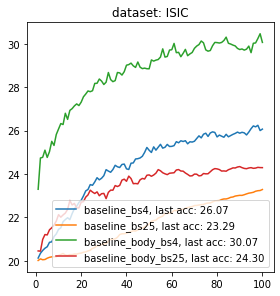

In [212]:
alg1 = 'baseline_bs4'
alg2 = 'baseline_bs25'
alg3 = 'baseline_body_bs4'
alg4 = 'baseline_body_bs25'

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

###

mean_lst, conf_lst = calc_mean_conf(alg1_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}'.format(alg1, mean_lst[-1]))
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='b', alpha=.1)

### 

mean_lst, conf_lst = calc_mean_conf(alg2_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}'.format(alg2, mean_lst[-1]))
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='r', alpha=.1)

###

mean_lst, conf_lst = calc_mean_conf(alg3_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}'.format(alg3, mean_lst[-1]))
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='b', alpha=.1)

### 

mean_lst, conf_lst = calc_mean_conf(alg4_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}'.format(alg4, mean_lst[-1]))
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='r', alpha=.1)

###

plt.tight_layout()
plt.title('dataset: {}'.format(dataset))
plt.legend(loc=4)
plt.show()
plt.close()

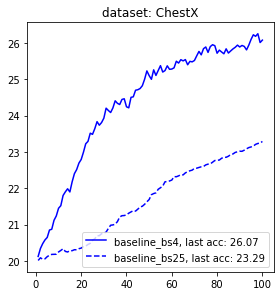

In [197]:
alg1 = 'baseline_bs4'
alg2 = 'baseline_bs25'
alg3 = 'baseline_body_bs4'
alg4 = 'baseline_body_bs25'

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

###

mean_lst, conf_lst = calc_mean_conf(alg1_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}'.format(alg1, mean_lst[-1]), color='b')
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='b', alpha=.1)

### 

mean_lst, conf_lst = calc_mean_conf(alg2_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}'.format(alg2, mean_lst[-1]), color='b', ls='--')
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='r', alpha=.1)

###

mean_lst, conf_lst = calc_mean_conf(alg3_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}'.format(alg3, mean_lst[-1]), color='r')
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='b', alpha=.1)

### 

mean_lst, conf_lst = calc_mean_conf(alg4_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}'.format(alg4, mean_lst[-1]), color='r', ls='--')
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='r', alpha=.1)

###

plt.tight_layout()
plt.title('dataset: {}'.format(dataset))
plt.legend(loc=4)
plt.show()
plt.close()

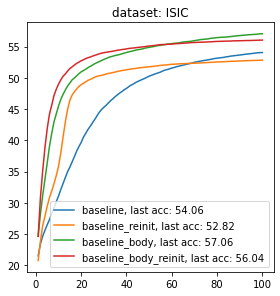

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

###

alg1_max_results = make_max_df(alg1_results)
mean_lst, conf_lst = calc_mean_conf(alg1_max_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}'.format(alg1, mean_lst[-1]))
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='b', alpha=.1)

### 

alg2_max_results = make_max_df(alg2_results)
mean_lst, conf_lst = calc_mean_conf(alg2_max_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}'.format(alg2, mean_lst[-1]))
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='r', alpha=.1)

###

alg3_max_results = make_max_df(alg3_results)
mean_lst, conf_lst = calc_mean_conf(alg3_max_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}'.format(alg3, mean_lst[-1]))
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='b', alpha=.1)

### 

alg4_max_results = make_max_df(alg4_results)
mean_lst, conf_lst = calc_mean_conf(alg4_max_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}'.format(alg4, mean_lst[-1]))
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='r', alpha=.1)

###

plt.tight_layout()
plt.title('dataset: {}'.format(dataset))
plt.legend(loc=4)
plt.show()
plt.close()

---

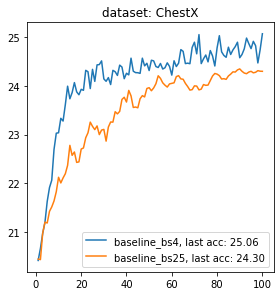

In [150]:
alg1 = 'baseline_bs4'
alg2 = 'baseline_bs25'

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

###

mean_lst, conf_lst = calc_mean_conf(alg1_results)
# alg1_max_results = make_max_df(alg1_results)
# mean_lst, conf_lst = calc_mean_conf(alg1_max_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}'.format(alg1, mean_lst[-1]))
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='b', alpha=.1)

### 

mean_lst, conf_lst = calc_mean_conf(alg2_results)
# alg2_max_results = make_max_df(alg2_results)
# mean_lst, conf_lst = calc_mean_conf(alg2_max_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}'.format(alg2, mean_lst[-1]))
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='b', alpha=.1)

### 

# alg1_max_results = make_max_df(alg1_results)
# mean_lst, conf_lst = calc_mean_conf(alg1_max_results)
# x = np.arange(1, len(mean_lst)+1)
# ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}'.format(alg2, mean_lst[-1]))
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='r', alpha=.1)

plt.tight_layout()
plt.title('dataset: {}'.format(dataset))
plt.legend(loc=4)
plt.show()
plt.close()